In [5]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [21]:
#Loading the dataset
car = pd.read_csv('/Users/muhammadhassanzahoor/Desktop/NEU/ALY 6020 - Predictive Analytics/Module 2/Assignment 2/car.csv')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
#Step 1: Data Cleaning

In [23]:
#Converting Horsepower to numeric
car['Horsepower'] = pd.to_numeric(car['Horsepower'], errors = 'coerce')

In [25]:
#Checking for missing values
car.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [27]:
#Filling the missing values with mean
car.fillna(car.mean(), inplace = True)

In [29]:
#Converting Cylinders and US Made to Categorical to save storage and to tell the model they're groups and not numbers
car['Cylinders'] = car['Cylinders'].astype('category')
car['US Made'] = car['Cylinders'].astype('category')

In [31]:
#Step 2: EDA

In [33]:
#Summary statistics
car.describe()

,MPG,Displacement,Horsepower,Weight,Acceleration,Model Year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,82.000000


<function matplotlib.pyplot.show(close=None, block=None)>

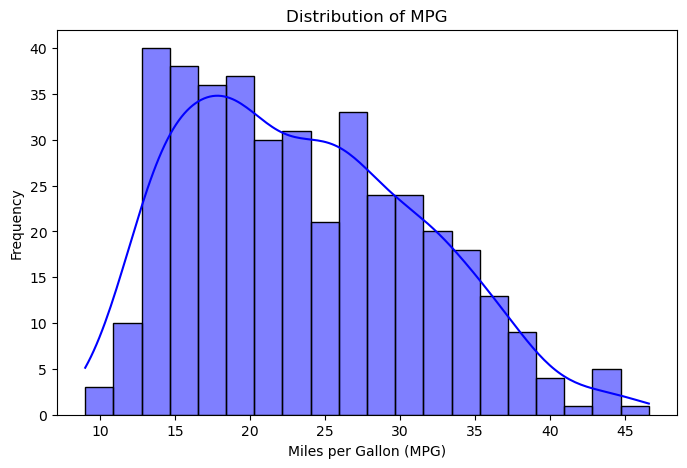

In [37]:
#visualizing the distribution of MPG
plt.figure(figsize = (8,5))
sns.histplot(car["MPG"], kde = True, bins = 20, color = 'blue')
plt.title('Distribution of MPG')
plt.xlabel('Miles per Gallon (MPG)')
plt.ylabel('Frequency')
plt.show

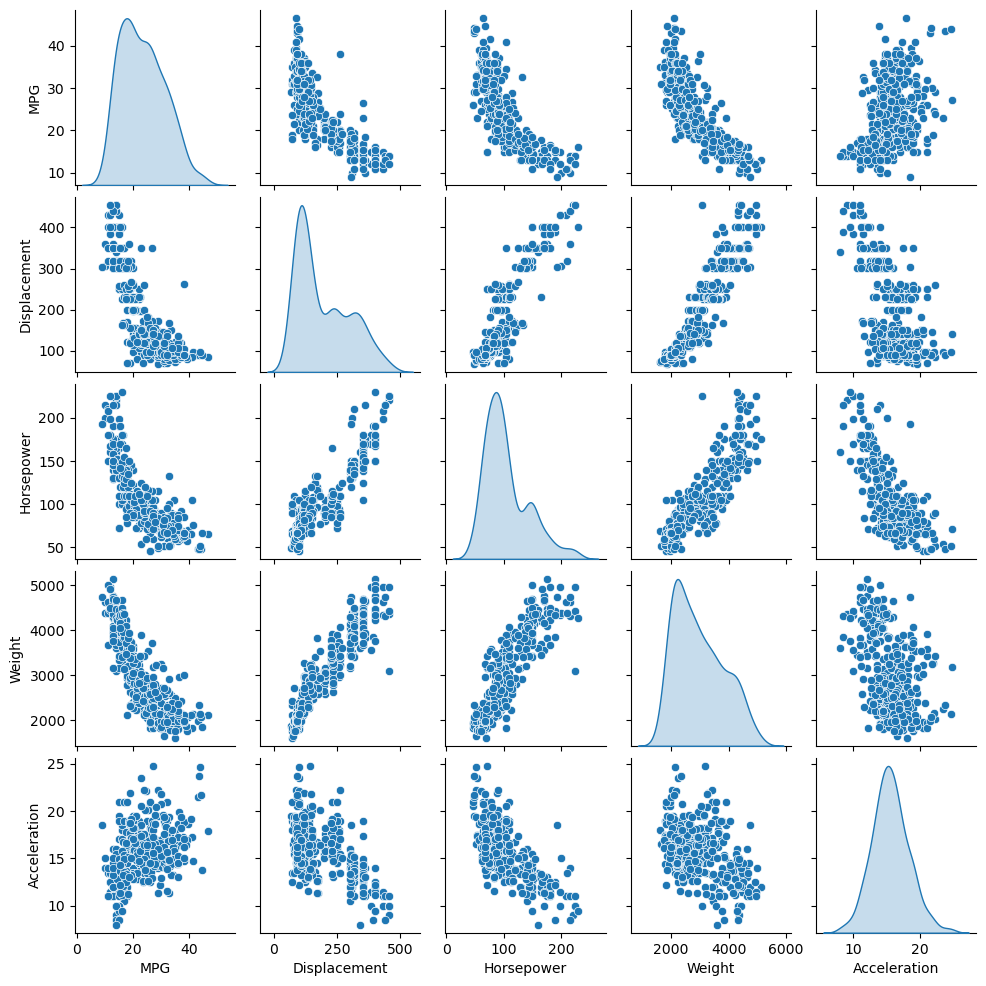

In [41]:
#visualizing pairplots for numerical variables
numerical_features = ['MPG','Displacement', 'Horsepower', 'Weight', 'Acceleration']
sns.pairplot(car[numerical_features], diag_kind = 'kde', height = 2)
plt.show()

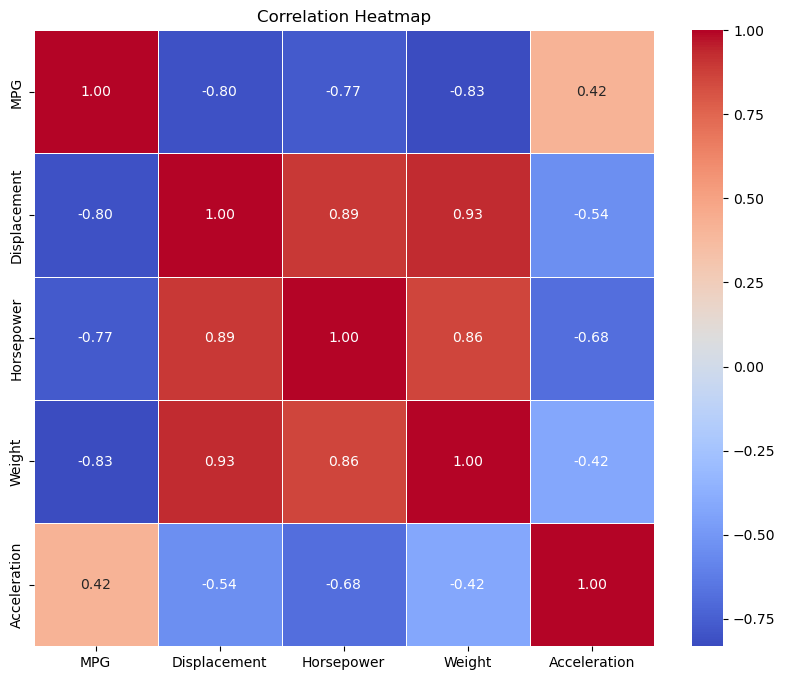

In [45]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = car[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [47]:
#Step 3: Linear Regression Model

In [51]:
#Preparing features and target variable
X = car[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'US Made']]
X = pd.get_dummies(X, drop_first = True) #Converting categorical variables into dummy variables
y = car['MPG']

In [53]:
#Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [55]:
#Building and training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
#predicting and evaluating the model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 7.911046960401636
R-Squared Score: 0.8528627447040026


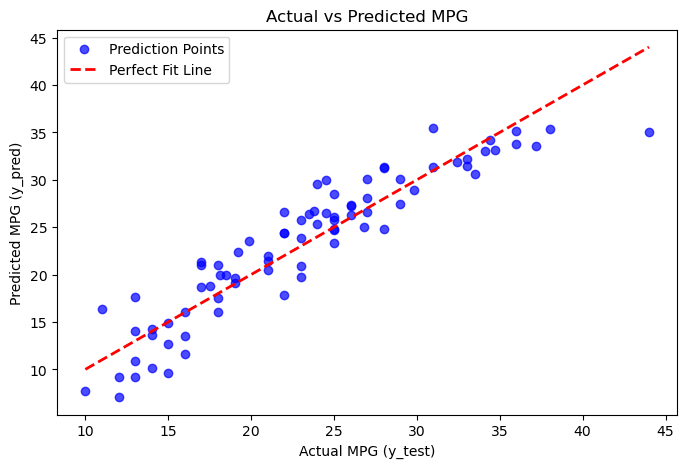

In [73]:
#Scatterplot of actual vs predicited MPG
plt.figure(figsize=(8, 5))
# Scatter plot for predictions vs actuals
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Prediction Points')

# Perfect fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Fit Line')

# Adding labels and title
plt.title("Actual vs Predicted MPG")
plt.xlabel("Actual MPG (y_test)")
plt.ylabel("Predicted MPG (y_pred)")

# Display legend
plt.legend()
plt.show()

In [75]:
#Step 4: Model Optimization

In [81]:
#Feature Selection
selector = SelectKBest(score_func = f_regression, k = 'all') #ranking each feature in predicting MPG (y)
X_new = selector.fit_transform(X, y)

In [101]:
#Getting scores and p values
scores = selector.scores_

p_values = selector.pvalues_

In [93]:
#Combing scores and features 
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores, 'P-Value': p_values})
print(feature_scores.sort_values(by='Score', ascending=False))

         Feature       Score        P-Value
2         Weight  888.850683  2.972800e-103
0   Displacement  724.994303   1.655889e-91
1     Horsepower  582.056109   9.255478e-80
5    Cylinders_4  535.669840   1.418931e-75
9      US Made_4  535.669840   1.418931e-75
8    Cylinders_8  285.592018   1.247395e-48
12     US Made_8  285.592018   1.247395e-48
4     Model Year  199.982008   4.844936e-37
3   Acceleration   84.957700   1.823092e-18
7    Cylinders_6   22.901017   2.411939e-06
11     US Made_6   22.901017   2.411939e-06
6    Cylinders_5    0.733740   3.921916e-01
10     US Made_5    0.733740   3.921916e-01


In [95]:
#Keeping only the important features
significant_features = feature_scores[feature_scores['P-Value'] < 0.05]['Feature']
X_significant = X[significant_features]

In [97]:
#training the model again with only the important features
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(X_significant, y, test_size=0.2, random_state=42)
model_sig = LinearRegression()
model_sig.fit(X_train_sig, y_train_sig)

LinearRegression()

In [99]:
#Evaluating the optimized model
y_pred_sig = model_sig.predict(X_test_sig)
print("Optimized Mean Squared Error:", mean_squared_error(y_test_sig, y_pred_sig))
print("Optimized R-squared Score:", r2_score(y_test_sig, y_pred_sig))


Optimized Mean Squared Error: 7.8783180589232815
Optimized R-squared Score: 0.8534714682720059
